# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
# write your code here
data = pd.read_csv("5_a.csv")
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [5]:
data.describe()

,y,proba,ypred
count,10100.000000,10100.000000,10100.0
mean,0.990099,0.697493,1.0
std,0.099015,0.114336,0.0
min,0.000000,0.500019,1.0
25%,1.000000,0.600532,1.0
50%,1.000000,0.697013,1.0
75%,1.000000,0.793915,1.0
max,1.000000,0.899965,1.0


In [4]:
data['ypred'] = [1.0 if x > = 0.5 else 0 for x in data['proba']]
data['ypred'].value_counts()

1.0    10100
Name: ypred, dtype: int64

In [6]:
data['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [10]:
class performance_metrics():
    
    def __init__(self,actual,predicted):
        self.actual = actual
        self.predicted = predicted
        self.TN = 0
        self.FP = 0
        self.FN = 0
        self.TP = 0
        
    def confusion_matrix(self):
        classes = set(self.actual)
        confusion_matrix = np.zeros((len(classes),len(classes)))
        for i,j in zip(self.actual,self.predicted):
            confusion_matrix[int(i),int(j)] += 1
        self.TN,self.FP,self.FN,self.TP = confusion_matrix.ravel()
        return confusion_matrix
    
    def precision(self):
        return self.TP/(self.TP+self.FP)
    
    def recall(self):
        #if (self.TP+self.FN) == 0:
        #    return 0
        #else:
        return self.TP/(self.TP+self.FN)
    
    def f1score(self):
        return 2*( (float(self.precision())*float(self.recall())) / (float(self.precision())+float(self.recall())) )
    
    def FPR (self):
        #if (self.TN+self.FP) == 0:
        #    return 0
        #else:
        return self.FP/(self.TN+self.FP)
    
    def accuracy(self):
        return (self.TP+self.TN) /(len(self.predicted))


In [17]:
# Confusion Matrix
a = performance_metrics(data['y'],data['ypred'])
a.confusion_matrix()

array([[    0.,   100.],
       [    0., 10000.]])

In [18]:
# F-1 Score
a.f1score()

0.9950248756218906

In [239]:
# accuracy
a.accuracy()

0.9900990099009901

In [235]:
# AUC score
from tqdm import tqdm 

probs = data['proba']
act = data['y']
prd = []
tpr_list,fpr_list,threshold = [],[],[]

for thres in tqdm(sorted(probs, reverse = True)):
    threshold.append(thres)
    #print(thres)
    prd = [1.0 if x > thres else 0 for x in probs]
    #print(prd)
    temp = performance_metrics(act,prd)
    temp.confusion_matrix()
    #print(temp.TP)
    #print("RECALL = "+ str(temp.recall()))
    tpr_list.append(temp.recall())
    fpr_list.append(temp.FPR())

100%|██████████| 10100/10100 [01:51<00:00, 90.44it/s]


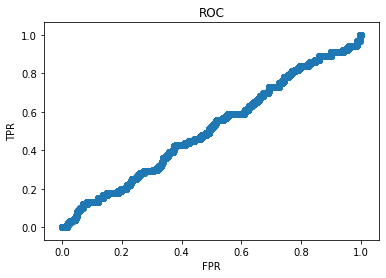

AUC score = 0.48829900000000004


In [247]:
import matplotlib.pyplot as plt
plt.scatter(tpr_list,fpr_list)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
AUC_score = np.trapz(tpr_list,fpr_list)
print("AUC score = {}".format(AUC_score))


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [7]:
# write your code
datab = pd.read_csv("5_b.csv")
datab['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [11]:
datab['ypred'] = [1 if x > 0.5 else 0 for x in datab['proba']]
datab['ypred'].value_counts()

0    9806
1     294
Name: ypred, dtype: int64

In [12]:
b = performance_metrics(datab['y'],datab['ypred'])
b.confusion_matrix()

array([[9761.,  239.],
       [  45.,   55.]])

In [13]:
# F-1 Score
b.f1score()

0.2791878172588833

100%|██████████| 10100/10100 [01:50<00:00, 91.01it/s]


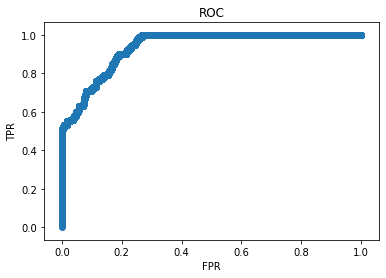

AUC score = 0.9376570000000001


In [15]:
from tqdm import tqdm 

probs = datab['proba']
act = datab['y']
prd = []
tpr_list,fpr_list,threshold = [],[],[]

for thres in tqdm(sorted(probs, reverse = True)):
    threshold.append(thres)
    #print(thres)
    prd = [1.0 if x > thres else 0 for x in probs]
    #print(prd)
    temp = performance_metrics(act,prd)
    temp.confusion_matrix()
    #print(temp.TP)
    #print("RECALL = "+ str(temp.recall()))
    tpr_list.append(temp.recall())
    fpr_list.append(temp.FPR())
    
import matplotlib.pyplot as plt
plt.scatter(fpr_list,tpr_list)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
AUC_score = np.trapz(tpr_list,fpr_list)
print("AUC score = {}".format(AUC_score))

In [246]:
# accuracy
b.accuracy()

0.9900990099009901

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [252]:
 # write your code

datac = pd.read_csv("5_c.csv")
datac.describe()

,y,prob
count,2852.000000,2852.000000
mean,0.367111,0.370069
std,0.482102,0.207414
min,0.000000,0.028038
25%,0.000000,0.201460
50%,0.000000,0.336935
75%,1.000000,0.509001
max,1.000000,0.957747


100%|██████████| 2852/2852 [00:08<00:00, 341.39it/s]


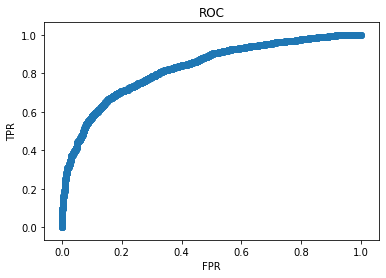

AUC score = 0.8282601391126739


In [311]:
from tqdm import tqdm 

probs = datac['prob']
act = datac['y']
prd = []
tpr_list,fpr_list,threshold,A_list = [],[],[],[]

for thres in tqdm(sorted(probs, reverse = True)):
    threshold.append(thres)
    #print(thres)
    prd = [1 if x > thres else 0 for x in probs]
    #print(prd)
    temp = performance_metrics(act,prd)
    temp.confusion_matrix()
    #print(temp.TP)
    #print("RECALL = "+ str(temp.recall()))
    A_list.append((500*temp.FN) + (100*temp.FP))
    tpr_list.append(temp.recall())
    fpr_list.append(temp.FPR())
    
import matplotlib.pyplot as plt
plt.scatter(fpr_list,tpr_list)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
AUC_score = np.trapz(tpr_list,fpr_list)
print("AUC score = {}".format(AUC_score))

In [264]:
#Best threshold that minimizes A
index = A_list.index(np.min(A_list))
best_threshold = threshold[index]
best_threshold

0.22987164436159915

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [282]:
datad = pd.read_csv("5_d.csv")
datad.describe()

,y,pred
count,157200.000000,157200.000000
mean,66.562087,66.483715
std,63.714792,62.340840
min,0.000000,-6.000000
25%,11.000000,12.000000
50%,52.000000,52.000000
75%,104.000000,103.000000
max,440.000000,421.000000


In [285]:
#MSE

MSE = np.sum([(y-ypred)**2 for y,ypred in zip(datad['y'],datad['pred'])])/len(datad)
MSE

177.16569974554707

In [310]:
#MAPE

MAPE = np.sum([np.abs(y-ypred) for y,ypred in zip(datad['y'],datad['pred'])])/np.sum(datad['y'])
MAPE

0.1291202994009687

In [307]:
#R^2

ymean = np.mean(datad['y'])
SStot = np.sum([(y-ymean)**2 for y in datad['y']])
SSres = np.sum([(y-ypred)**2 for y,ypred in zip(datad['y'],datad['pred'])])
r2 = (1 - (SSres/SStot))
print(r2)

0.9563582786990937
